<a href="https://colab.research.google.com/github/rohitrrk22/Deep-Learning/blob/master/Audio_Data/Music_Genre_Identification/Project2_Music_Genre_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [2]:
!wget https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz

--2020-11-15 14:24:54--  https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/4jw31k5mlzcmgis/genres.tar.gz [following]
--2020-11-15 14:24:55--  https://www.dropbox.com/s/raw/4jw31k5mlzcmgis/genres.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucef78f8074266510e1ddb9a06f1.dl.dropboxusercontent.com/cd/0/inline/BDPCjfofI1VXwluzW64VGXBnGqg5kIKM2_f9K-BlCLkjCEGFp6ERssu545sO15Vqfjlh5uKciqjBo1bhfDOwjOaynITxDB4t-QTpGDuCagfX-g/file# [following]
--2020-11-15 14:24:55--  https://ucef78f8074266510e1ddb9a06f1.dl.dropboxusercontent.com/cd/0/inline/BDPCjfofI1VXwluzW64VGXBnGqg5kIKM2_f9K-BlCLkjCEGFp6ERssu545sO15Vqfjlh5uKciqjBo1bhfDOwjOaynITxDB4t-QTpGDuCagfX-g/file
Resolving uce

In [3]:
!tar xvzf /content/genres.tar.gz      #extract contents of .tar.gz file

genres/
genres/blues/
genres/blues/blues.00000.au
genres/blues/blues.00001.au
genres/blues/blues.00002.au
genres/blues/blues.00003.au
genres/blues/blues.00004.au
genres/blues/blues.00005.au
genres/blues/blues.00006.au
genres/blues/blues.00007.au
genres/blues/blues.00008.au
genres/blues/blues.00009.au
genres/blues/blues.00010.au
genres/blues/blues.00011.au
genres/blues/blues.00012.au
genres/blues/blues.00013.au
genres/blues/blues.00014.au
genres/blues/blues.00015.au
genres/blues/blues.00016.au
genres/blues/blues.00017.au
genres/blues/blues.00018.au
genres/blues/blues.00019.au
genres/blues/blues.00020.au
genres/blues/blues.00021.au
genres/blues/blues.00022.au
genres/blues/blues.00023.au
genres/blues/blues.00024.au
genres/blues/blues.00025.au
genres/blues/blues.00026.au
genres/blues/blues.00027.au
genres/blues/blues.00028.au
genres/blues/blues.00029.au
genres/blues/blues.00030.au
genres/blues/blues.00031.au
genres/blues/blues.00032.au
genres/blues/blues.00033.au
genres/blues/blues.00034.a

In [4]:
 !rm /content/genres.tar.gz
 #!rm /content/genres.tar.gz.1

In [5]:
# Imports
import os
import librosa
import librosa.display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras import utils
from keras.utils import to_categorical

#np.random.seed(1)

In [6]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import pathlib
import csv
import shutil

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd

## Coverting Audio Data to Spectrogram

In [7]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))

genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'/content/genres/{g}'):
        songname = f'/content/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.jpg')
        plt.clf()

<Figure size 720x720 with 0 Axes>

In [8]:
genres

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [9]:
import IPython.display as ipd

sound_file = '/content/genres/hiphop/hiphop.00000.au'

ipd.Audio(sound_file,autoplay=True)

## Ploting the Spectrogram for each Genre

In [10]:
def plot_spectrogram(genre):
    '''
    This function takes in a list of genres and plots a mel spectrogram for one song 
    per genre.
    '''
    
    # Loading in the audio file
    y, sr = librosa.core.load(f'/content/genres/{genre}/{genre}.00000.au')
    
    # Computing the spectrogram and transforming it to the decibal scale
    spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
    spect = librosa.power_to_db(spect, ref=np.max) # Converting to decibels
    
    # Plotting the transformed spectrogram
    plt.figure(figsize=(10,7))
    librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
    plt.title(str(genre))
    plt.show()

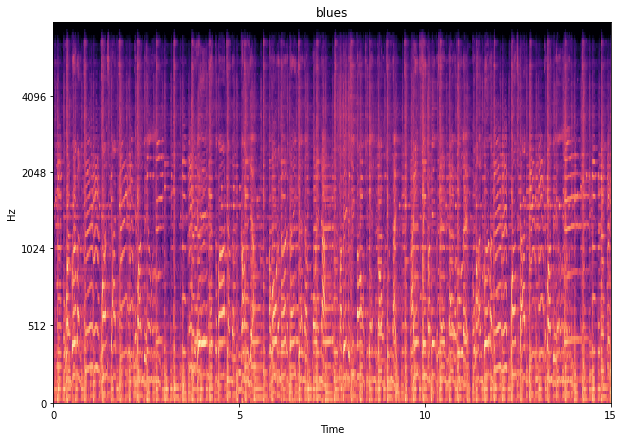

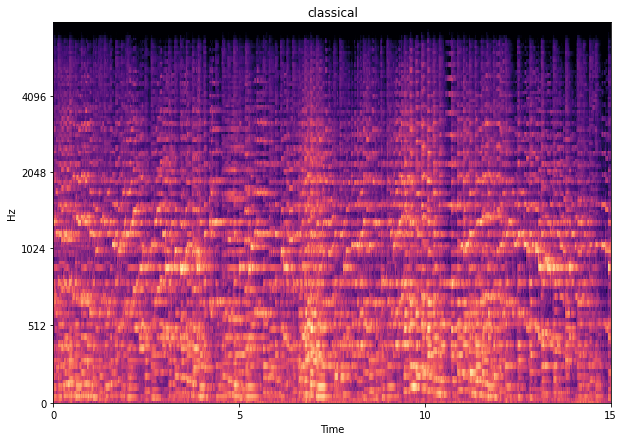

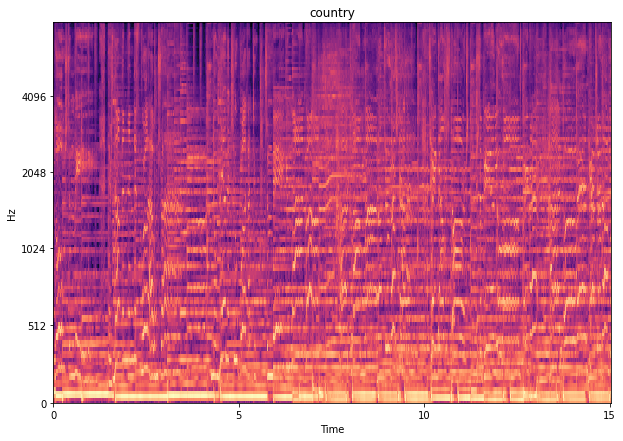

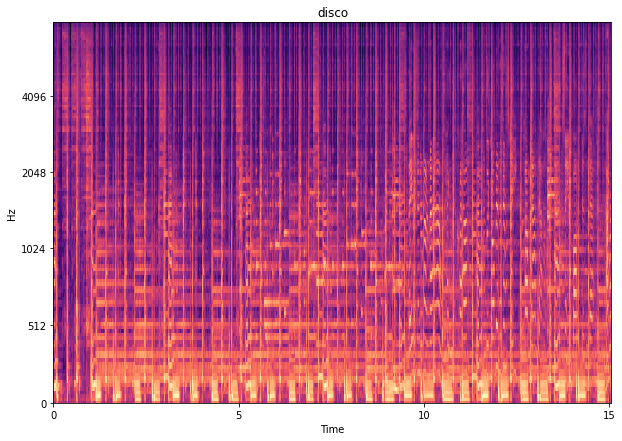

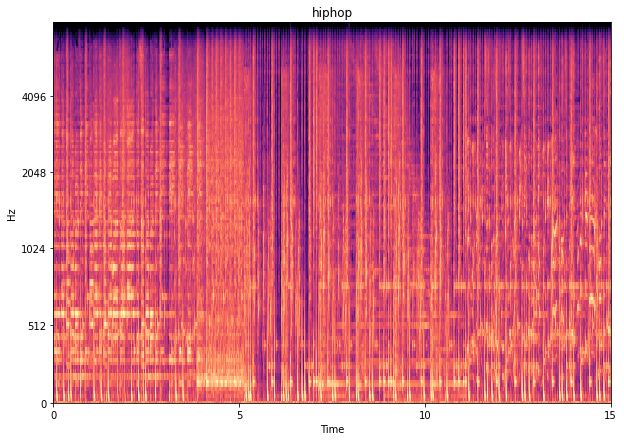

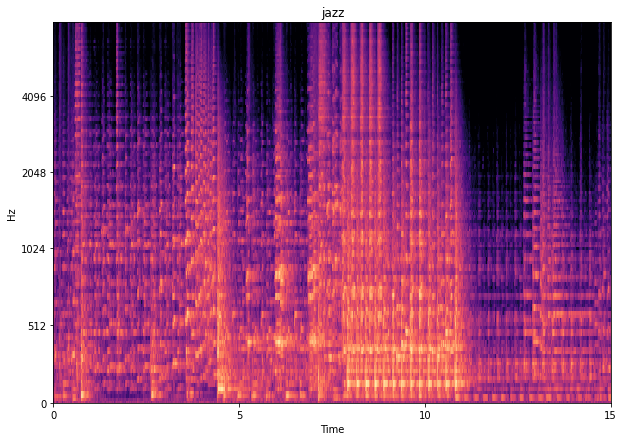

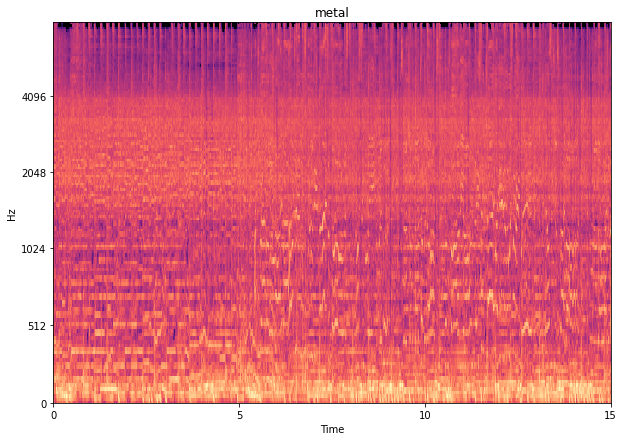

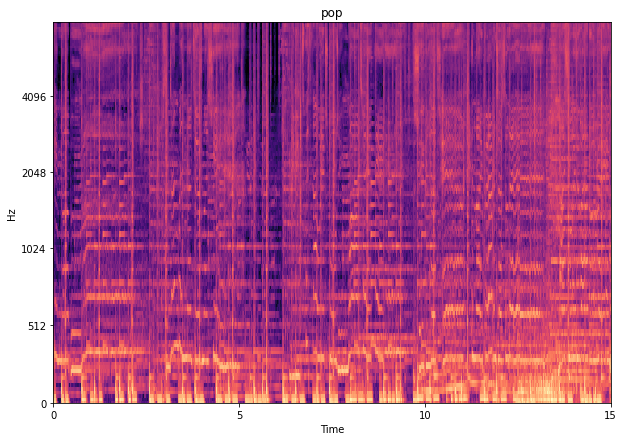

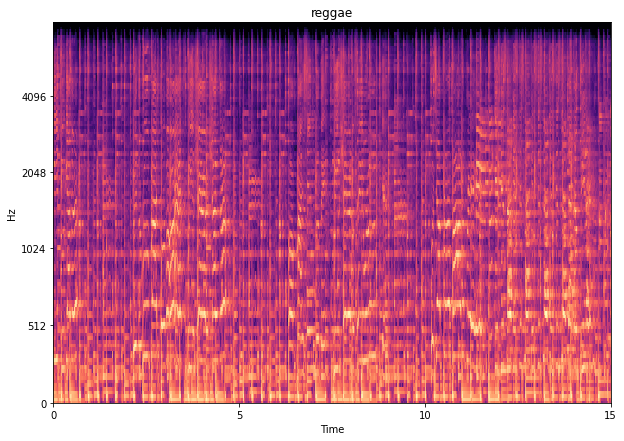

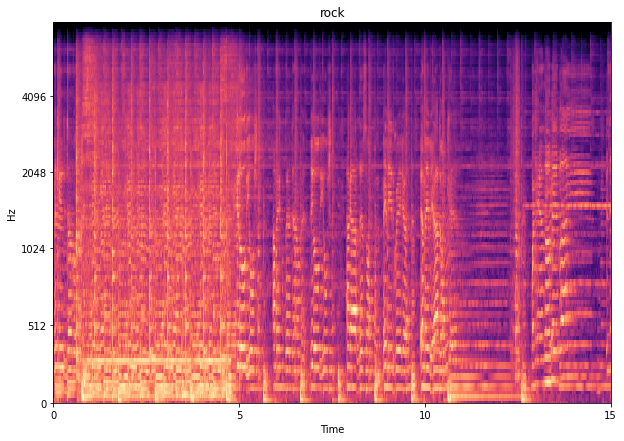

In [11]:
# Plotting spectrogram for each genre
for genre in genres:
    plot_spectrogram(genre)

## Splitting the Dataset into Train,Validation and Test Folders

In [12]:
dir = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for d in dir:
    #Train folder
    pathlib.Path(f'train/{d}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'/content/img_data/{d}'):
        spect_img_trn = f'/content/img_data/{d}'
    #Test folder
    pathlib.Path(f'test/{d}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'/content/img_data/{d}'):
        spect_img_test = f'/content/img_data/{d}'
    #Validation folder
    pathlib.Path(f'validation/{d}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'/content/img_data/{d}'):
        spect_img_test = f'/content/img_data/{d}'


    # Creating partitions of the data after shuffeling
    currentCls = f'/content/img_data/{d}'
    src = currentCls # Folder to copy images from

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

    # print('Total images: ', len(allFileNames))
    # print('Training: ', len(train_FileNames))
    # print('Validation: ', len(val_FileNames))
    # print('Testing: ', len(test_FileNames))

        # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name,f'/content/train/{d}')

    for name in val_FileNames:
        shutil.copy(name, f'/content/validation/{d}')

    for name in test_FileNames:
        shutil.copy(name, f'/content/test/{d}')

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

WIDTH = 300
HEIGHT = 300
BATCH_SIZE = 100
TRAIN_DIR='/content/train'
VAL_DIR=r'/content/validation'

# data prep
train_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = validation_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical')



Found 700 images belonging to 10 classes.
Found 150 images belonging to 10 classes.


## Model Definition & Summary

In [14]:
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications import InceptionV3

#from keras.preprocessing import image

IMAGE_SIZE = [300, 300]   

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
pre_trained_model = InceptionV3(input_shape = IMAGE_SIZE + [3], weights = "imagenet", include_top = False)  
# vgg = InceptionV3(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  

# this will exclude the initial layers from training phase as there are already been trained.
for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
#print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(10, activation='softmax')(x)           

model = Model(inputs = pre_trained_model.input, outputs = x) 

adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=adam,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()    


87916544/87910968 [==============================] - 0s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________

## Training the Model on Train Data & testing the accuracy on Validation Data

In [15]:

# Initializing a random seed for replication purposes
np.random.seed(23456)
tf.random.set_seed(123)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.735):
            print("\nReached 74% val_accuracy so cancelling training!")
            self.model.stop_training = True


from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0.000001, patience=50,
                          verbose=1, mode='auto')
callbacks = myCallback()

history = model.fit(train_generator,
                              epochs=10000000,
                              steps_per_epoch = 700 // BATCH_SIZE,
                              validation_data=validation_generator,
                              validation_steps = 150 // BATCH_SIZE, 
                              verbose = 2,
                              callbacks=[earlystop,callbacks])

Epoch 1/10000000
7/7 - 8s - loss: 2.6137 - accuracy: 0.1457 - val_loss: 2.0918 - val_accuracy: 0.2700
Epoch 2/10000000
7/7 - 7s - loss: 2.0340 - accuracy: 0.2643 - val_loss: 1.8328 - val_accuracy: 0.4200
Epoch 3/10000000
7/7 - 7s - loss: 1.6898 - accuracy: 0.4000 - val_loss: 1.5167 - val_accuracy: 0.4800
Epoch 4/10000000
7/7 - 7s - loss: 1.4519 - accuracy: 0.5100 - val_loss: 1.4112 - val_accuracy: 0.4700
Epoch 5/10000000
7/7 - 7s - loss: 1.3230 - accuracy: 0.5429 - val_loss: 1.4182 - val_accuracy: 0.5100
Epoch 6/10000000
7/7 - 7s - loss: 1.1407 - accuracy: 0.6014 - val_loss: 1.2940 - val_accuracy: 0.5500
Epoch 7/10000000
7/7 - 7s - loss: 0.9994 - accuracy: 0.6714 - val_loss: 1.2581 - val_accuracy: 0.6000
Epoch 8/10000000
7/7 - 7s - loss: 0.8808 - accuracy: 0.7300 - val_loss: 1.1148 - val_accuracy: 0.6400
Epoch 9/10000000
7/7 - 7s - loss: 0.7759 - accuracy: 0.7614 - val_loss: 1.1427 - val_accuracy: 0.6100
Epoch 10/10000000
7/7 - 7s - loss: 0.7109 - accuracy: 0.7800 - val_loss: 1.0200 - 

In [16]:
validation_generator = validation_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False)

Found 150 images belonging to 10 classes.


In [17]:
predictions = model.predict(validation_generator)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [18]:
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys()) 
#class_labels = np.asarray(validation_generator.class_indices.keys())

In [19]:
class_labels

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
#print(report) 

In [22]:
print(report) 

              precision    recall  f1-score   support

       blues       0.75      0.60      0.67        15
   classical       0.79      1.00      0.88        15
     country       0.58      0.73      0.65        15
       disco       0.62      0.67      0.65        15
      hiphop       0.92      0.73      0.81        15
        jazz       0.60      0.60      0.60        15
       metal       0.94      1.00      0.97        15
         pop       0.65      0.73      0.69        15
      reggae       0.74      0.93      0.82        15
        rock       0.40      0.13      0.20        15

    accuracy                           0.71       150
   macro avg       0.70      0.71      0.69       150
weighted avg       0.70      0.71      0.69       150



In [23]:
conf_matrix=confusion_matrix(true_classes, predicted_classes)

In [24]:
confusion_df = pd.DataFrame(conf_matrix)
confusion_df

0   1   2   3   4  5   6   7   8  9
0  9   0   1   1   0  3   1   0   0  0
1  0  15   0   0   0  0   0   0   0  0
2  0   0  11   0   0  0   0   2   2  0
3  0   0   2  10   1  1   0   1   0  0
4  0   0   1   1  11  1   0   1   0  0
5  1   3   0   0   0  9   0   0   0  2
6  0   0   0   0   0  0  15   0   0  0
7  0   0   0   2   0  0   0  11   1  1
8  0   0   0   0   0  0   0   1  14  0
9  2   1   4   2   0  1   0   1   2  2

In [25]:
true_classes.shape

(150,)

In [26]:
predicted_classes.shape

(150,)

In [27]:
class_labels

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [28]:
# Creating a dictionary of labels
labels_dict = {
    0: 'blues',
    1: 'classical',
    2: 'country',
    3: 'disco',
    4: 'hiphop',
    5: 'jazz',
    6: 'metal',
    7: 'pop',
    8: 'reggae',
    9: 'rock'
}

In [29]:
# Renaming rows and columns with labes
confusion_df = confusion_df.rename(columns=labels_dict)
confusion_df.index = confusion_df.columns
confusion_df

blues  classical  country  disco  ...  metal  pop  reggae  rock
blues          9          0        1      1  ...      1    0       0     0
classical      0         15        0      0  ...      0    0       0     0
country        0          0       11      0  ...      0    2       2     0
disco          0          0        2     10  ...      0    1       0     0
hiphop         0          0        1      1  ...      0    1       0     0
jazz           1          3        0      0  ...      0    0       0     2
metal          0          0        0      0  ...     15    0       0     0
pop            0          0        0      2  ...      0   11       1     1
reggae         0          0        0      0  ...      0    1      14     0
rock           2          1        4      2  ...      0    1       2     2

[10 rows x 10 columns]

## Confusion Matrix on Validation Data Set

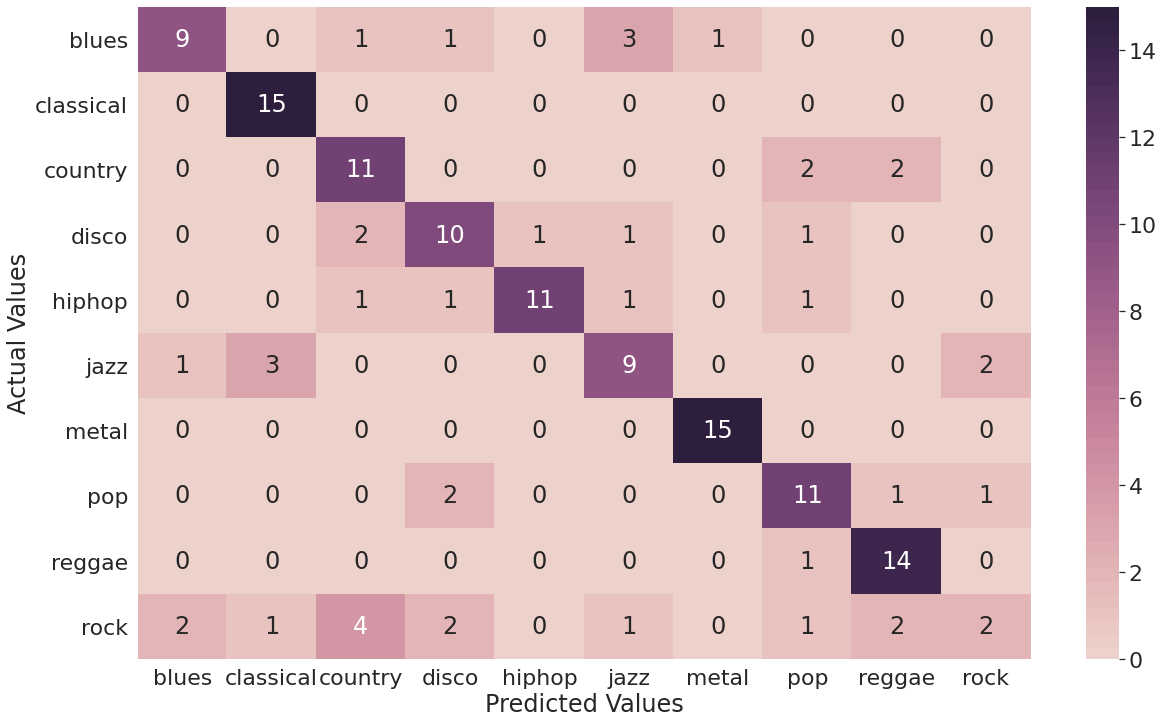

In [30]:
# Creating a heatmap for the confusion matrix for display
plt.figure(figsize= (20,12))
sns.set(font_scale = 2);
ax = sns.heatmap(confusion_df, annot=True, cmap=sns.cubehelix_palette(50));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

## Accuracy & Loss Plot on Train & Validation Data

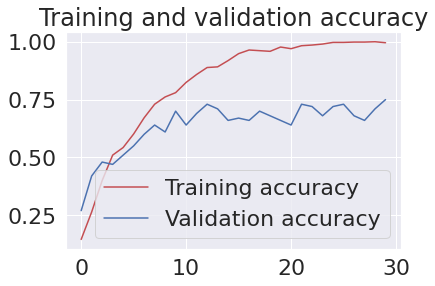

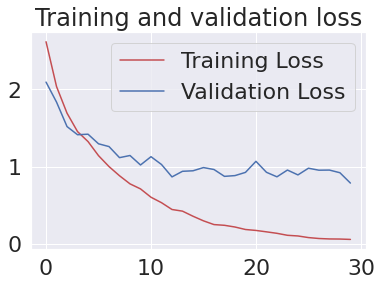

In [31]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Merging Train and validation set

In [32]:
#Merging Train and validation set
import glob
import shutil
import os

dir = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for d in dir:
    train_dir = f'/content/train/{d}'
    validation_dir =f'/content/validation/{d}' 

    for img in glob.iglob(os.path.join(validation_dir, "*.jpg")):
      shutil.copy(img, train_dir)
    

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

WIDTH = 300
HEIGHT = 300
BATCH_SIZE = 100
TRAIN_DIR='/content/train'
TEST_DIR=r'/content/test'

# data prep
train_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 850 images belonging to 10 classes.
Found 150 images belonging to 10 classes.


## Training the model on entire Train Dataset(Train & Validation),validating the accuracy on Test Set

In [56]:

# Initializing a random seed for replication purposes
np.random.seed(23456)
tf.random.set_seed(123)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.735):
            print("\nReached 74% accuracy so cancelling training!")
            self.model.stop_training = True


from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0.000001, patience=50,
                          verbose=1, mode='auto')
callbacks = myCallback()

history = model.fit(train_generator,
                              epochs=100,
                              steps_per_epoch = 700 // BATCH_SIZE,
                              validation_data=test_generator,
                              validation_steps = 150 // BATCH_SIZE, 
                              verbose = 2,
                              callbacks=[earlystop,callbacks])


Epoch 1/100
7/7 - 8s - loss: 0.0030 - accuracy: 0.9986 - val_loss: 1.1658 - val_accuracy: 0.7100
Epoch 2/100
7/7 - 7s - loss: 0.0046 - accuracy: 0.9986 - val_loss: 1.0571 - val_accuracy: 0.7300
Epoch 3/100
7/7 - 7s - loss: 0.0046 - accuracy: 0.9985 - val_loss: 1.0258 - val_accuracy: 0.7300
Epoch 4/100
7/7 - 7s - loss: 0.0036 - accuracy: 0.9986 - val_loss: 1.1708 - val_accuracy: 0.7300
Epoch 5/100

Reached 74% accuracy so cancelling training!
7/7 - 6s - loss: 0.0107 - accuracy: 0.9969 - val_loss: 1.0340 - val_accuracy: 0.7400


In [57]:
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False)

Found 150 images belonging to 10 classes.


In [58]:
predictions = model.predict(test_generator)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [59]:
predicted_classes

array([0, 0, 0, 0, 0, 6, 0, 8, 3, 9, 0, 2, 2, 4, 9, 1, 1, 1, 1, 5, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 9, 2, 2, 2, 0, 8, 9, 2, 2, 6,
       2, 3, 3, 7, 3, 7, 9, 8, 2, 9, 3, 3, 9, 4, 2, 3, 4, 4, 4, 4, 4, 4,
       7, 4, 4, 4, 4, 4, 4, 4, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1,
       5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 2, 7, 4,
       7, 2, 7, 7, 2, 7, 8, 7, 7, 7, 8, 8, 8, 8, 6, 8, 2, 8, 4, 8, 8, 8,
       2, 8, 8, 9, 4, 2, 9, 2, 8, 2, 1, 8, 0, 0, 3, 0, 6, 9])

In [60]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 

In [61]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)


In [62]:
print(report) 

              precision    recall  f1-score   support

       blues       0.64      0.47      0.54        15
   classical       0.88      0.93      0.90        15
     country       0.45      0.67      0.54        15
       disco       0.75      0.40      0.52        15
      hiphop       0.72      0.87      0.79        15
        jazz       0.93      0.93      0.93        15
       metal       0.79      1.00      0.88        15
         pop       0.77      0.67      0.71        15
      reggae       0.65      0.73      0.69        15
        rock       0.27      0.20      0.23        15

    accuracy                           0.69       150
   macro avg       0.68      0.69      0.67       150
weighted avg       0.68      0.69      0.67       150



In [63]:
conf_matrix=confusion_matrix(true_classes, predicted_classes)
confusion_df = pd.DataFrame(conf_matrix)
confusion_df


0   1   2  3   4   5   6   7   8  9
0  7   0   2  1   1   0   1   0   1  2
1  0  14   0  0   0   1   0   0   0  0
2  1   0  10  0   0   0   1   0   1  2
3  0   0   2  6   1   0   0   2   1  3
4  0   0   0  0  13   0   0   1   0  1
5  0   1   0  0   0  14   0   0   0  0
6  0   0   0  0   0   0  15   0   0  0
7  0   0   3  0   1   0   0  10   1  0
8  0   0   2  0   1   0   1   0  11  0
9  3   1   3  1   1   0   1   0   2  3

In [64]:
# Renaming rows and columns with labes
confusion_df = confusion_df.rename(columns=labels_dict)
confusion_df.index = confusion_df.columns
confusion_df

blues  classical  country  disco  ...  metal  pop  reggae  rock
blues          7          0        2      1  ...      1    0       1     2
classical      0         14        0      0  ...      0    0       0     0
country        1          0       10      0  ...      1    0       1     2
disco          0          0        2      6  ...      0    2       1     3
hiphop         0          0        0      0  ...      0    1       0     1
jazz           0          1        0      0  ...      0    0       0     0
metal          0          0        0      0  ...     15    0       0     0
pop            0          0        3      0  ...      0   10       1     0
reggae         0          0        2      0  ...      1    0      11     0
rock           3          1        3      1  ...      1    0       2     3

[10 rows x 10 columns]

## Confusion Matrix on Test Dataset

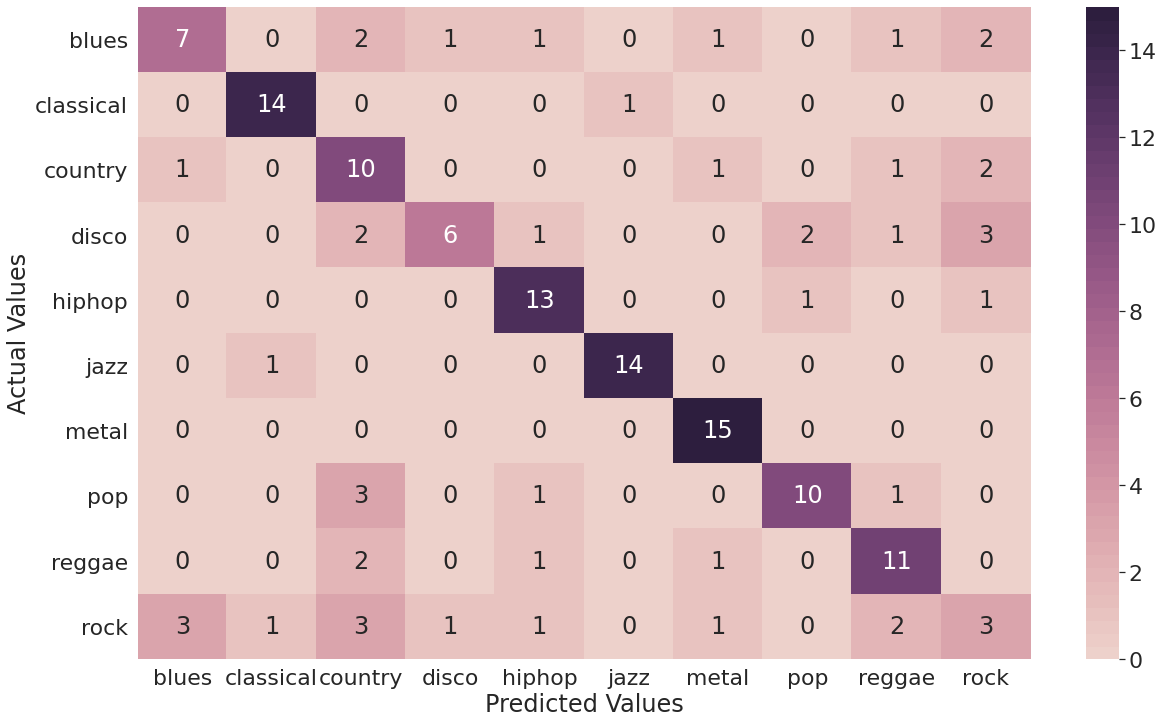

In [65]:
# Creating a heatmap for the confusion matrix for display
plt.figure(figsize= (20,12))
sns.set(font_scale = 2);
ax = sns.heatmap(confusion_df, annot=True, cmap=sns.cubehelix_palette(50));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

## Accuracy & Loss Plot on Train & Test Data

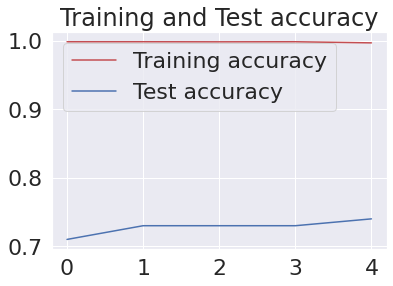

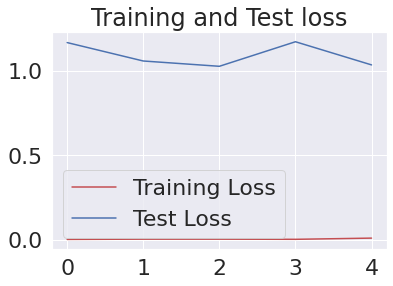

In [66]:
# Plot the chart for accuracy and loss on both Training and Test
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Test accuracy')
plt.title('Training and Test accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Test Loss')
plt.title('Training and Test loss')
plt.legend()

plt.show()